In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x, y):
    return x + y

xr, y0, n = (0, 3), 1, 100

## Euler Method

1. Start
2. Define function f(x,y)
3. Read values of initial condition(x0 and y0),
   number of steps (n) and calculation point (xn)
4. Calculate step size (h) = (xn - x0)/b
5. Set i=0
6. Loop
    yn = y0 + h *  f(x0 + i*h, y0)
    y0 = yn
    i = i + 1
    While i < n
7. Display yn as result
8. Stop

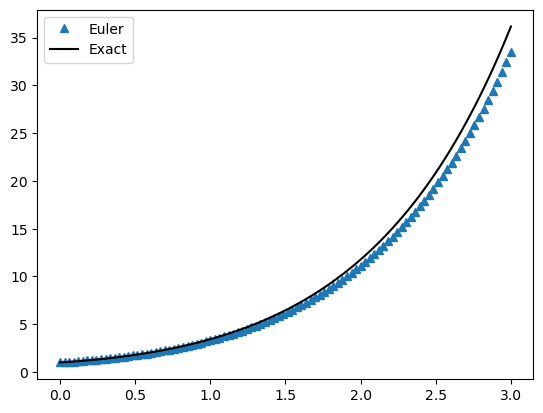

In [5]:
def euler(xn, yn, f, h):
    return yn + h * f(xn, yn)

def IVP_solve(solver, f, n):
    h = (xr[1] - xr[0]) / n
    x = np.linspace(xr[0], xr[1], n)
    y = np.zeros(len(x))
    y[0] = y0
    for n in range(len(x) - 1):
        y[n + 1] = solver(x[n], y[n], f, h)
    return x, y

#Exact Solution
def exact(x):
    return 2*np.exp(x) - x - 1


X1, Y1 = IVP_solve(euler, f, n)
X, Y = np.linspace(xr[0], xr[1], 100), exact(X1)

# For Ploting
plt.plot(X1, Y1, '^', label = 'Euler')
plt.plot(X, Y, 'k-', label = 'Exact')
plt.legend()
plt.show()

## Modified Euler

1. Define function f(x)
2. Enter initial value of x0 and y0
3. Enter the value of x for which y is to be calculated
4. Enter number of iterations
5. calculate step size (h)= (x-x0)/n
6. Using for loop:
7. i=1:n
8. x(i+1) = x(i) + h
9. yp(i+1) = y(i) + h * f(x(i),y(i))
10. y(i+1) = y(i) + h[ ( 0.5 * f[)x(i),y(i) + f(x(i+1),yp(i+1))]
11. Display the answer

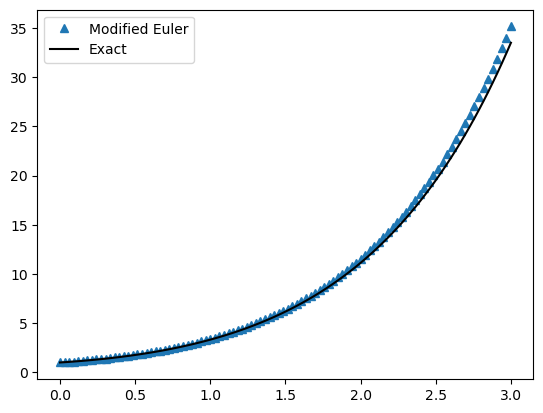

In [7]:
def mod_euler(xn, yn, f, h):
    yp = yn + h * f(xn, yn)
    return yn + h * 0.5 * (f(xn, yn) + f(xn + h, yp))

X2, Y2 = IVP_solve(mod_euler, f, n)

# For Ploting
plt.plot(X2, Y2, '^', label = 'Modified Euler')
plt.plot(X1, Y1, 'k-', label = 'Exact')
plt.legend()
plt.show()

## RK2

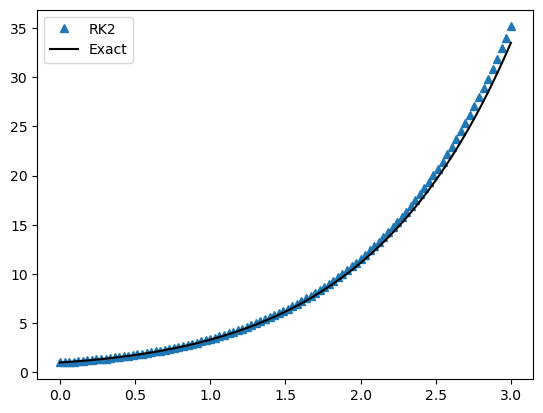

In [8]:
def rk2(xn, yn, f, h):
    k1 = h * f(xn, yn)
    k2 = h * f(xn + h, yn + k1)
    return yn + 0.5 * (k1 + k2)

X3, Y3 = IVP_solve(rk2, f, n)

# For Ploting
plt.plot(X3, Y3, '^', label = 'RK2')
plt.plot(X1, Y1, 'k-', label = 'Exact')
plt.legend()
plt.show()

## RK4

1. Start

2. Define function f(x,y

3. Read values of initial condition(x0 and y0),
   number of steps (n) and calculation point xn)

4. Calculate step size (h) = (xn -x0)/n

5.Set i=0
        oop

      k1 = h        0, y0)
      k2 = h * f(x0+        0+k1/2)
      k3 = h * f(x0        y0+k2/2)
      k4 = h *        , y0+k3)

      k = (k        2*k3+k4)/6

         yn = y0 +              i = i
             x0      + h
       = yn

   While i < n

7. Display yn as result


8. Stop

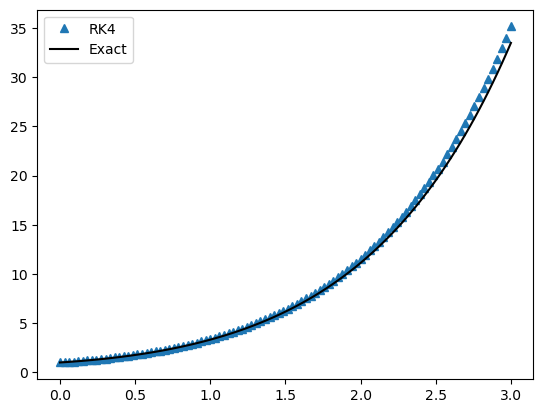

In [9]:
def rk4(xn, yn, f, h):
    k1 = f(xn, yn)
    k2 = f(xn + 0.5 * h, yn + 0.5 * h * k1)
    k3 = f(xn + 0.5 * h, yn + 0.5 * h * k2)
    k4 = f(xn + h, yn + h * k3)
    return yn + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

X4, Y4 = IVP_solve(rk4, f, n)

# For Ploting
plt.plot(X4, Y4, '^', label = 'RK4')
plt.plot(X1, Y1, 'k-', label = 'Exact')
plt.legend()
plt.show()

In [10]:
print('x    |   Exact     |    Euler      | Modified Euler |        RK2      |   RK4\n----------------------------------------------------------------------------------------')
for n in range(len(X)):
    print(f'{X[n]:0.1f}  | {Y[n]:10.6f}  |   {Y1[n]:10.6f}  |   {Y2[n]:10.6f}   |    {Y3[n]:10.6f}   |    {Y4[n]:10.6f}')

x    |   Exact     |    Euler      | Modified Euler |        RK2      |   RK4
----------------------------------------------------------------------------------------
0.0  |   1.000000  |     1.000000  |     1.000000   |      1.000000   |      1.000000
0.0  |   1.031231  |     1.030000  |     1.030900   |      1.030900   |      1.030909
0.1  |   1.064354  |     1.061809  |     1.063664   |      1.063664   |      1.063682
0.1  |   1.099430  |     1.095482  |     1.098348   |      1.098348   |      1.098377
0.1  |   1.136517  |     1.131073  |     1.135011   |      1.135011   |      1.135050
0.2  |   1.175677  |     1.168642  |     1.173712   |      1.173712   |      1.173764
0.2  |   1.216974  |     1.208247  |     1.214516   |      1.214516   |      1.214579
0.2  |   1.260474  |     1.249948  |     1.257484   |      1.257484   |      1.257560
0.2  |   1.306245  |     1.293811  |     1.302684   |      1.302684   |      1.302773
0.3  |   1.354357  |     1.339898  |     1.350182   |      